In [1]:
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data 

scratch_df = pd.read_csv('Data\scratch_df.csv')


class_etape_df = pd.read_csv('Data\class_etape_df.csv')


In [3]:
def race_dynamics_plot(scratch_df,race,year):
    
    filtered_df = scratch_df[(scratch_df['Race'] == race) & (scratch_df['year'] == year)]
    # Get unique values in the "Event" column
    unique_events = filtered_df['Event'].unique()

    # Create a line plot for each unique event
    for event in unique_events:
        event_df = filtered_df[filtered_df['Event'] == event]

        # Create a subplot for each row in event_df
        plt.figure(figsize=(10, 10))
        for index, row in event_df.iterrows():
            x_values = ['Gap to 1st CaP1 (s)', 'Gap to 1st Vélo Cum. (s)', 'Gap to 1st Total (s)']
            y_values = [row[x] for x in x_values]
            plt.plot(x_values, y_values, label=event_df["Athlète"][index])

        # Customize the plot
        plt.title(f'Event: {event}')
        plt.xlabel('Gap Type')
        plt.ylabel('Gap (seconds)')
        plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

        # Show or save the plot as needed
        plt.show()

In [4]:
def create_dataframe_top30(scratch_df,Race):
    df = pd.DataFrame()
    years = [2023, 2022, 2021, 2020, 2019, 2018]
    for year_idx, year in enumerate(years):
        unique_event = scratch_df[(scratch_df['Race'] == Race) & (scratch_df['year'] == year)]["Event"].unique()
        for event_idx, event in enumerate(unique_event):
            data_subset = scratch_df[(scratch_df['Event'] == event) & (scratch_df['year'] == year) & (scratch_df['Race'] == Race)]
            df = pd.concat([df,data_subset[:30]])
    return df

In [10]:
def plot_gap_all_athlete(race_to_plot,dataframe):
    data_columns = ['Gap to 1st CaP1 (s/km)', "Gap to 1st Vélo (s/km)", "Gap to 1st CaP2 (s/km)", "Gap to 1st Total (s/km)"]
    # Create subplots for each unique data column
    fig, axes = plt.subplots(nrows=len(data_columns), ncols=1, figsize=(8, 24))

    # Iterate through unique data columns and create boxplots
    for col_idx, column in enumerate(data_columns):
        data_subset = dataframe[(dataframe['Race'] == race_to_plot) & (~dataframe[column].isnull())]


        box = sns.boxplot(x='year', y=column, data=data_subset, ax=axes[col_idx], hue_order=["2023", "2022", "2021", "2020", "2019", "2018"], palette="hls")
        axes[col_idx].set_title(f'Boxplot of {column} for {race_to_plot}')
        axes[col_idx].set_xlabel('Year')
        axes[col_idx].set_ylabel('')
        # Set the y-axis limits for each subplot
        axes[col_idx].set_ylim(0, 60)

        # Add median, 1st quartile, and 3rd quartile annotations for each year in hue
        for i, year in enumerate([2018, 2019, 2020, 2021, 2022, 2023]):
            year_data = data_subset[data_subset['year'] == year]
            median = year_data[column].median()
            q1 = year_data[column].quantile(0.25)
            q3 = year_data[column].quantile(0.75)

            # Calculate the position for annotation based on box width
            posx = i - 0.05

            # Add annotations above the boxes
            box.text(posx, median + 0.3, str(round(median, 2)),fontsize = 12)


    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()

In [14]:
def plot_gap_3rd_athlete(race_to_plot,dataframe,ylim):

    data_columns = ['Gap to 1st for 3rd athlete per team (s)']

    # Create subplots for each unique data column
    fig, axes = plt.subplots(figsize=(10, 10))

    # Iterate through unique data columns and create boxplots
    for col_idx, column in enumerate(data_columns):
        data_subset = dataframe[(dataframe['Race'] == race_to_plot) & (~dataframe[column].isnull())]

        box = sns.boxplot(x='year', y=column, data=data_subset, ax=axes, hue_order=["2023", "2022", "2021", "2020", "2019", "2018"], palette="hls")
        axes.set_title(f'Boxplot of {column} for {race_to_plot}')
        axes.set_xlabel('Year')
        axes.set_ylabel('')
        # Set the y-axis limits for the subplot
        axes.set_ylim(0, ylim)

        # Add median, 1st quartile, and 3rd quartile annotations for each year in hue
        for i, year in enumerate([2018, 2019, 2020, 2021, 2022, 2023]):
            year_data = data_subset[data_subset['year'] == year]
            median = year_data[column].median()
            q1 = year_data[column].quantile(0.25)
            q3 = year_data[column].quantile(0.75)

            # Calculate the position for annotation based on box width
            posx = i - 0.1

            # Add annotations above the boxes
            box.text(posx, median + 8, str(round(median, 2)), fontsize=12)

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()

# 1. Global view

## 1.1 Visualization for each part of the race for every race category

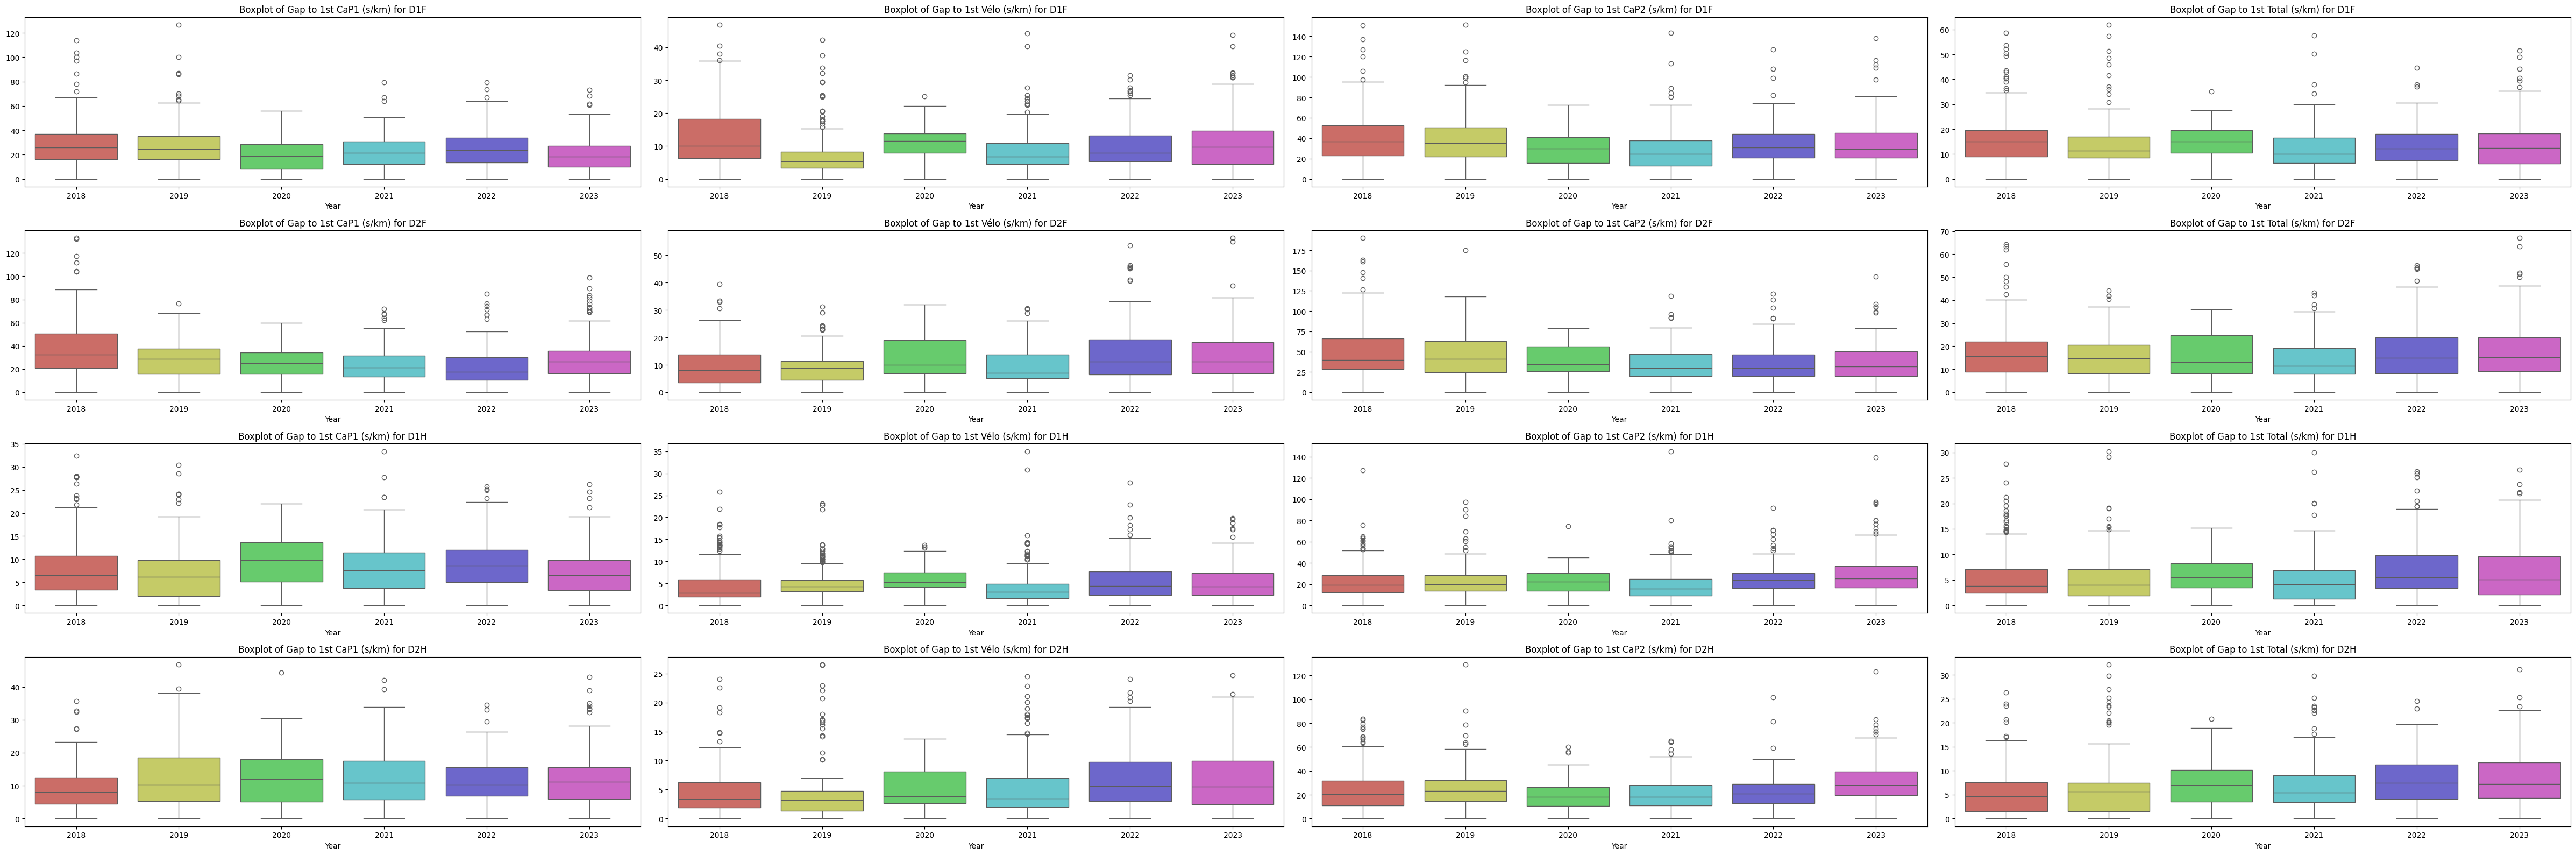

In [5]:
data_columns = ['Gap to 1st CaP1 (s/km)', "Gap to 1st Vélo (s/km)", "Gap to 1st CaP2 (s/km)", "Gap to 1st Total (s/km)"]

# Get unique races
unique_races = scratch_df['Race'].unique()

# Create subplots for each unique race and each data column
fig, axes = plt.subplots(nrows=len(unique_races), ncols=len(data_columns), figsize=(12 * len(data_columns), 4 * len(unique_races)))

# Iterate through unique races and create boxplots
for race_idx, race in enumerate(unique_races):
    data_subset = scratch_df[scratch_df['Race'] == race]
    for col_idx, column in enumerate(data_columns):
        data_subset = data_subset.dropna(subset=[column])  # Remove rows with missing values in the current column
        sns.boxplot(x='year', y=column, data=data_subset, ax=axes[race_idx][col_idx], hue_order=["2023", "2022", "2021", "2020", "2019", "2018"], palette="hls")
        axes[race_idx][col_idx].set_title(f'Boxplot of {column} for {race}')
        axes[race_idx][col_idx].set_xlabel('Year')
        axes[race_idx][col_idx].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


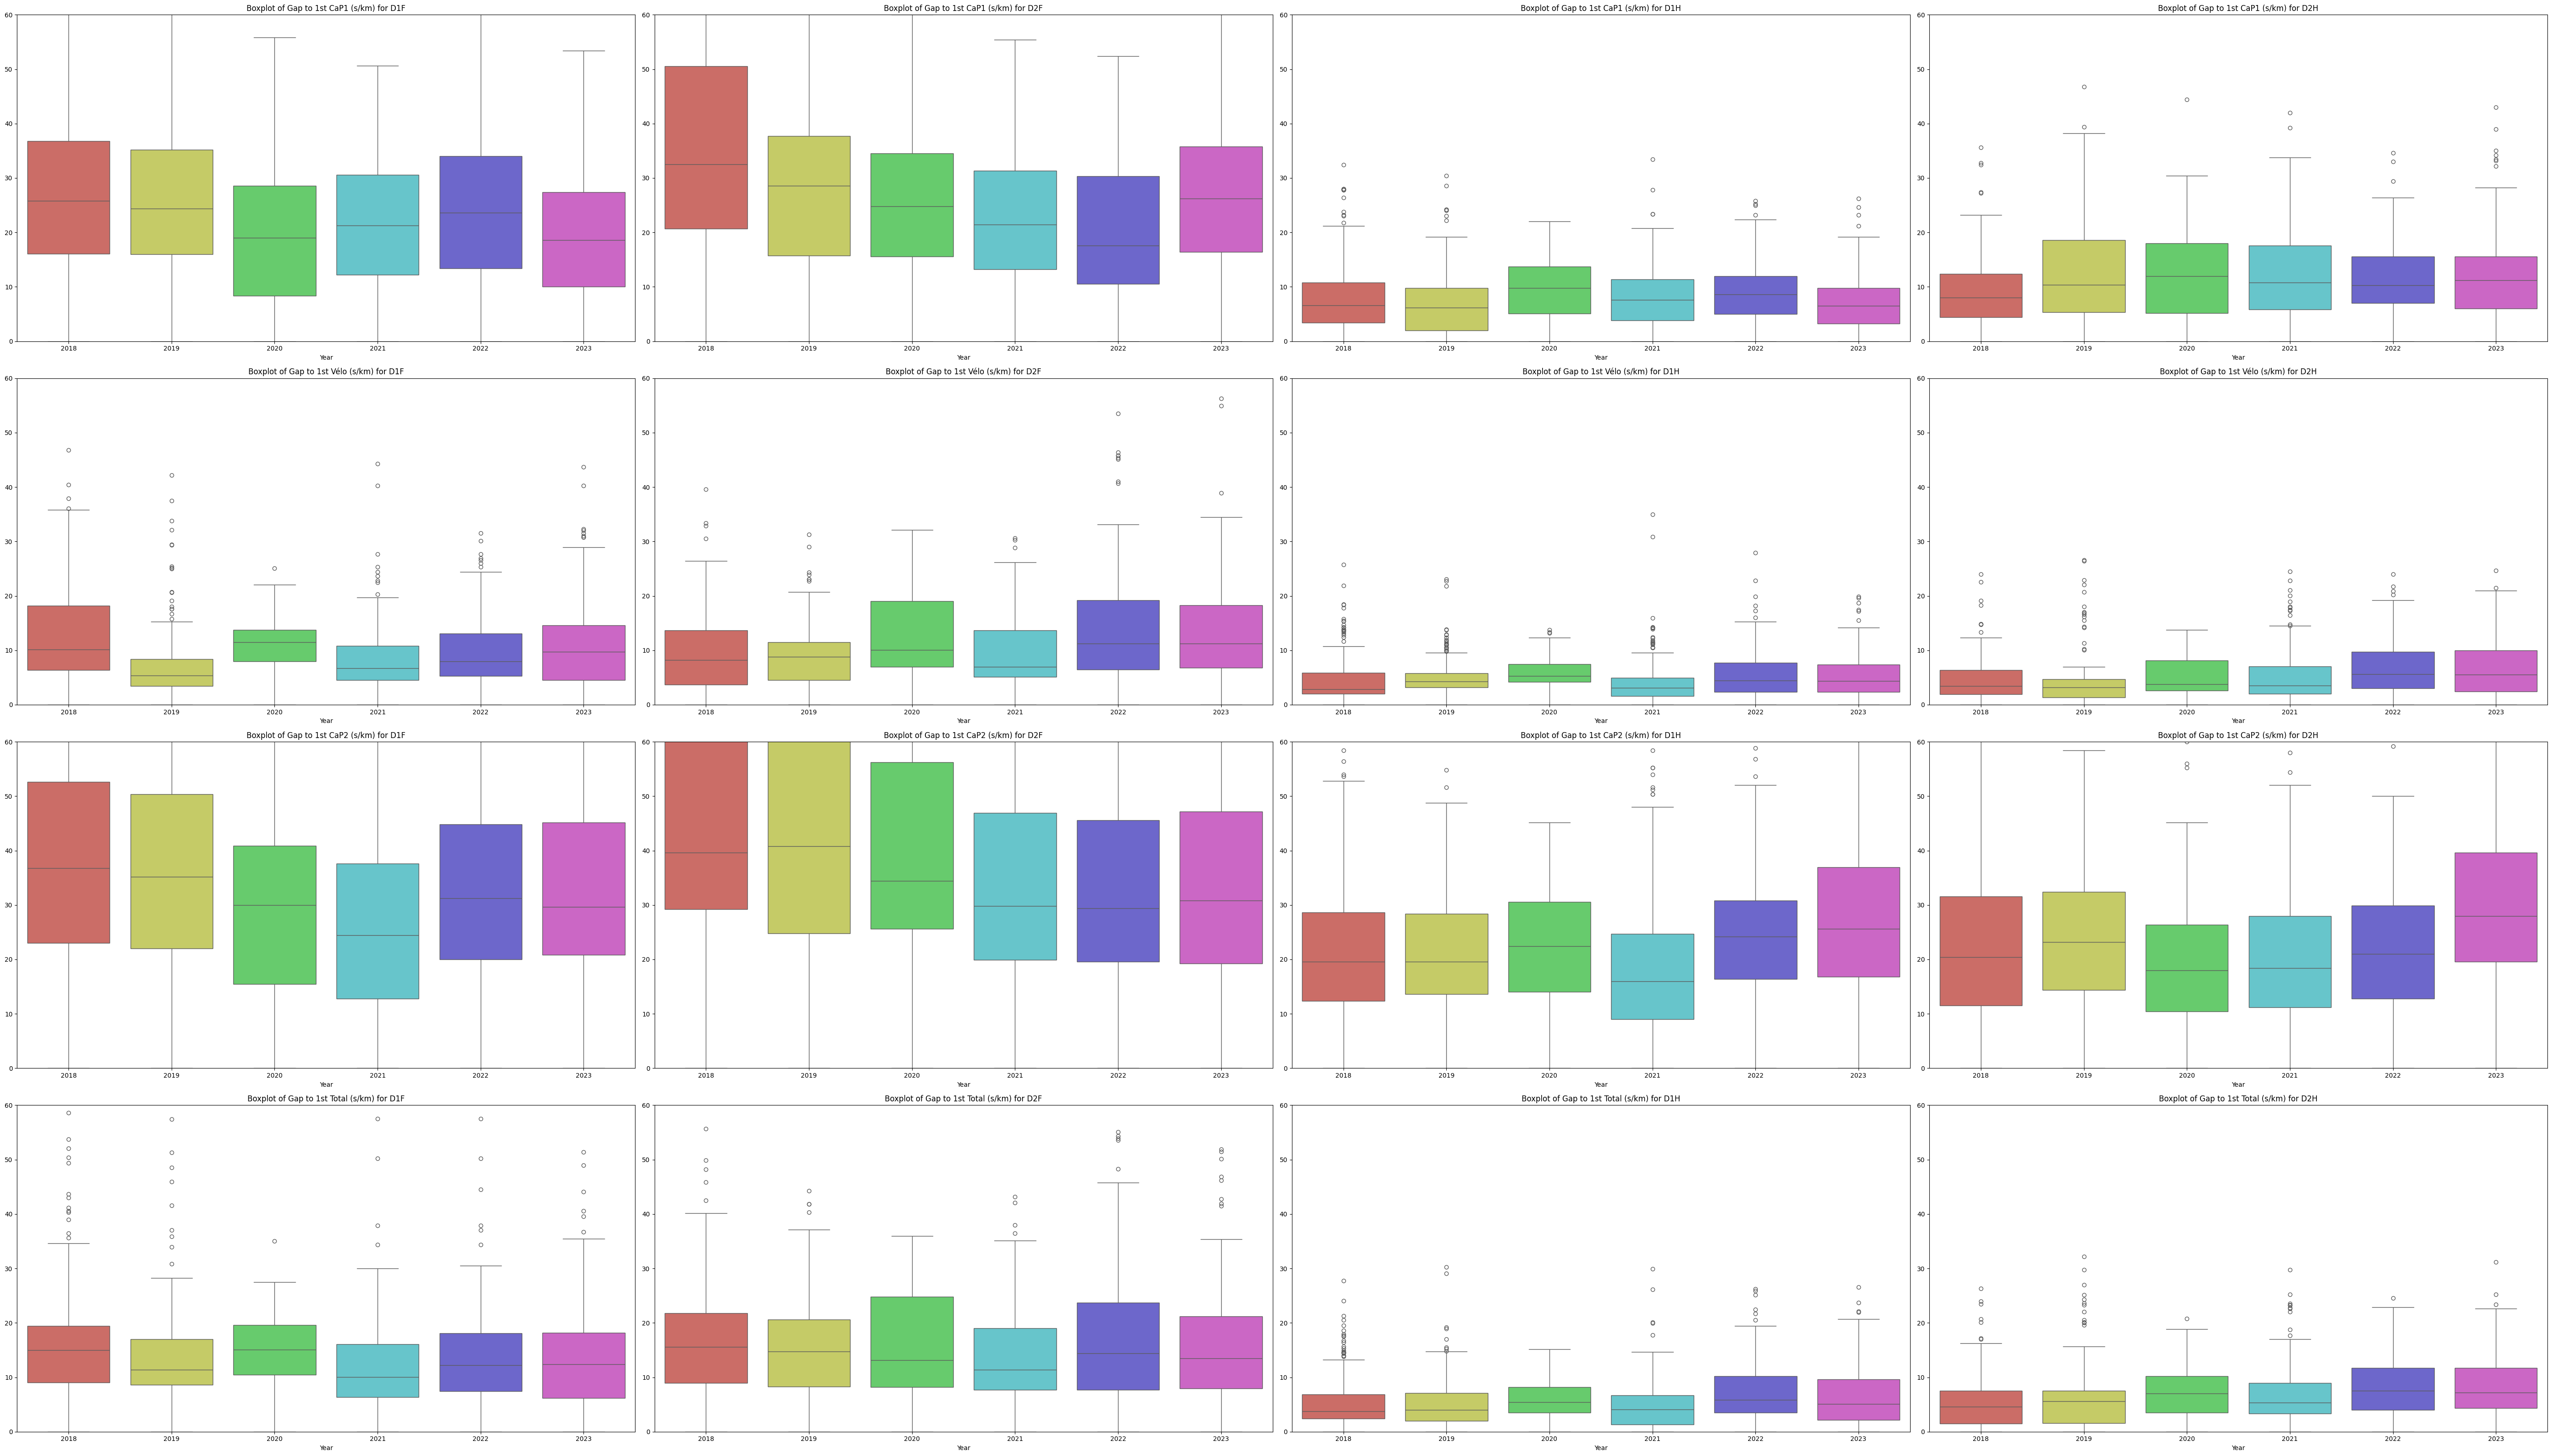

In [6]:
data_columns = ['Gap to 1st CaP1 (s/km)', "Gap to 1st Vélo (s/km)", "Gap to 1st CaP2 (s/km)", "Gap to 1st Total (s/km)"]

# Get unique races
unique_races = scratch_df['Race'].unique()
# Create subplots for each unique data column and each race
fig, axes = plt.subplots(nrows=len(data_columns), ncols=len(unique_races), figsize=(14 * len(unique_races), 8 * len(data_columns)))

# Iterate through unique data columns and create boxplots
for col_idx, column in enumerate(data_columns):
    for race_idx, race in enumerate(unique_races):
        data_subset = scratch_df[(scratch_df['Race'] == race) & (~scratch_df[column].isnull())]
        sns.boxplot(x='year', y=column, data=data_subset, ax=axes[col_idx][race_idx], hue_order=["2023", "2022", "2021", "2020", "2019", "2018"], palette="hls")
        axes[col_idx][race_idx].set_title(f'Boxplot of {column} for {race}')
        axes[col_idx][race_idx].set_xlabel('Year')
        axes[col_idx][race_idx].set_ylabel('')
        # Set the y-axis limits for each subplot
        axes[col_idx][race_idx].set_ylim(0, 60)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


## 1.2. Correlation matrix based on score

With correlation matrix based on score we can analyse the correlation between the performance for each part the race to the performance in other part. As you can see below, there is huge différence in ters of correlation between the category.

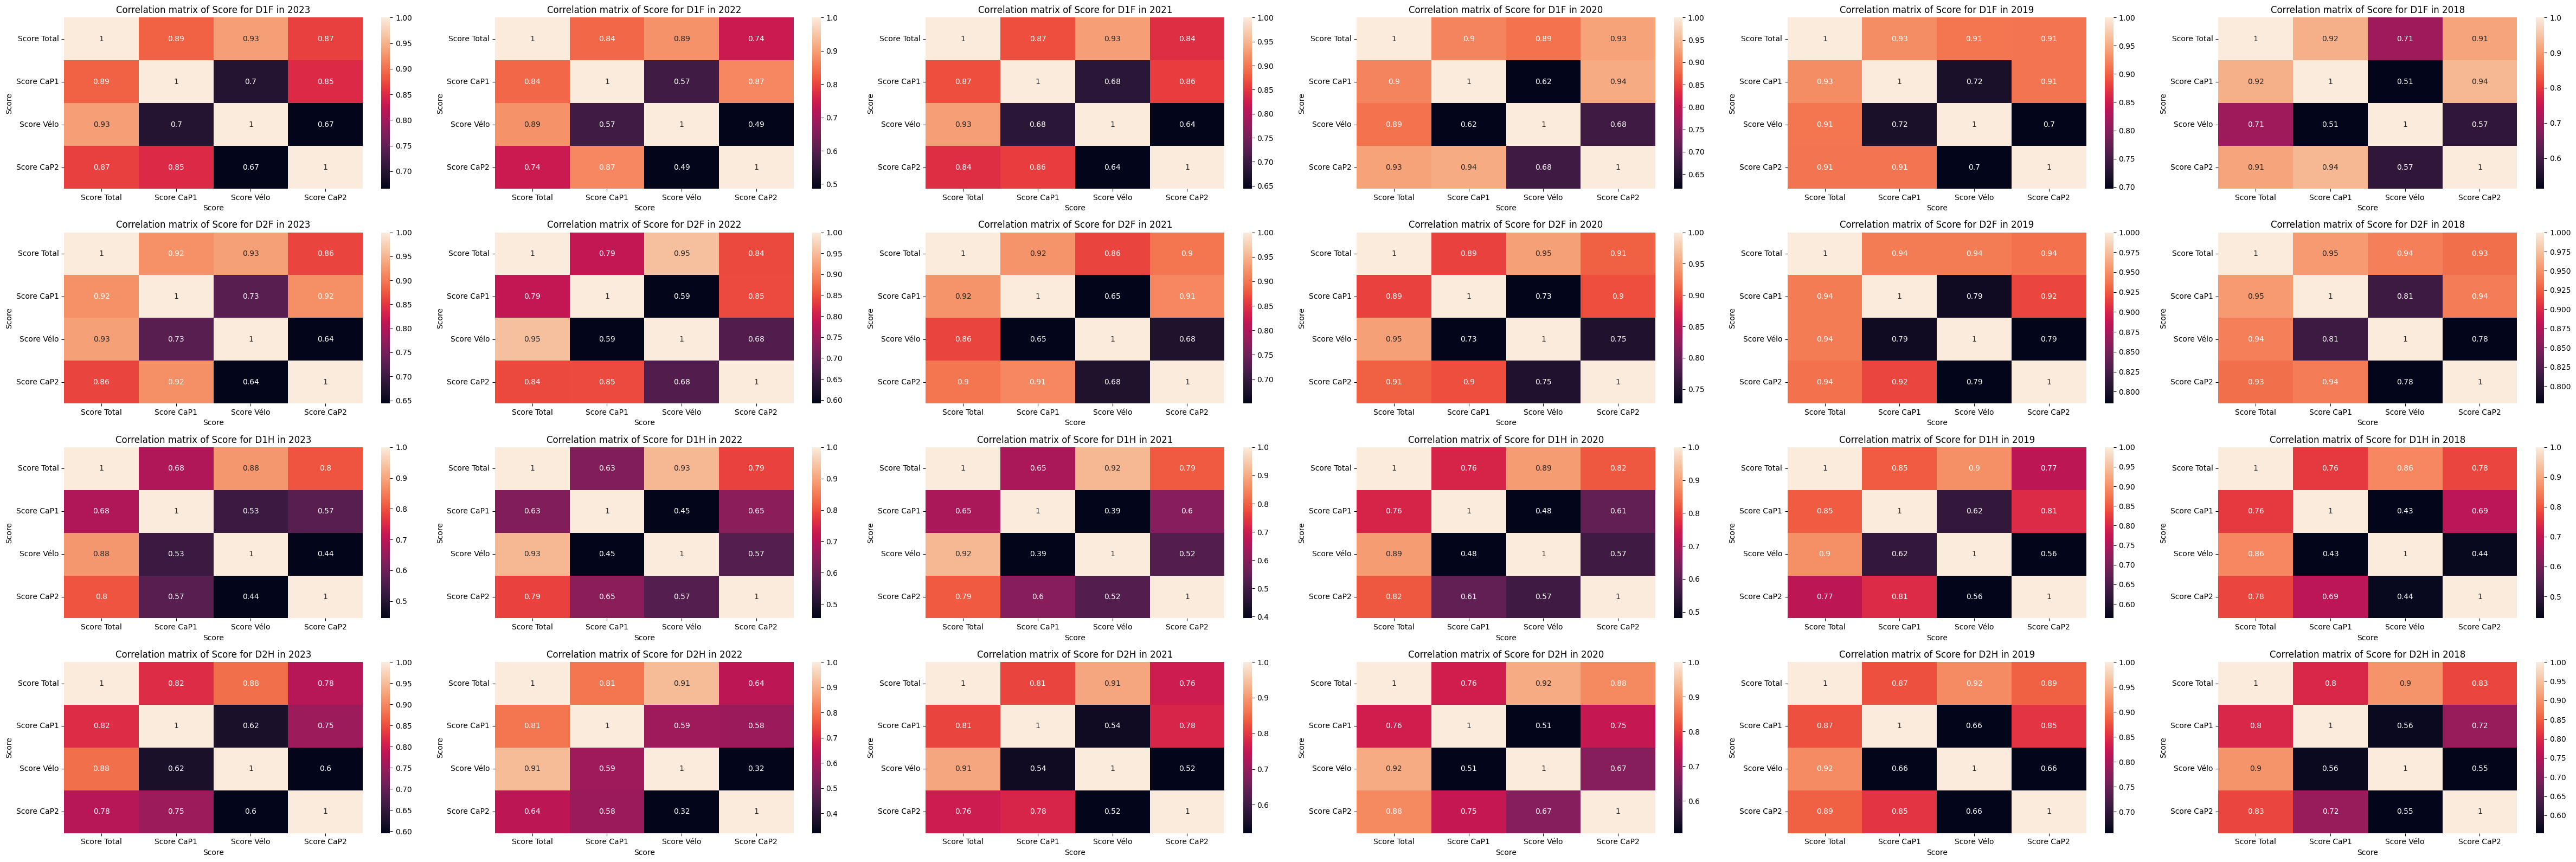

In [7]:
data_columns = ["Score Total", "Score CaP1", "Score Vélo", "Score CaP2"]

# Get unique races and years
unique_races = scratch_df['Race'].unique()
unique_years = scratch_df['year'].unique()

# Create subplots for each unique race and each data column
fig, axes = plt.subplots(nrows=len(unique_races), ncols=len(unique_years), figsize=(12 * len(data_columns), 4 * len(unique_races)))

# Iterate through unique races and create boxplots
for race_idx, race in enumerate(unique_races):
    for year_idx, year in enumerate(unique_years):
        # Use parentheses to separate the conditions correctly
        data_subset = scratch_df[(scratch_df['Race'] == race) & (scratch_df['year'] == year)][data_columns]
        corr = data_subset.corr()["Score Total"].abs().sort_values(ascending=False)
        data_subset = data_subset.dropna(subset=data_columns)  # Remove rows with missing values in the selected columns

        # Calculate the correct index for the subplot
        subplot_index = race_idx * len(unique_years) + year_idx + 1

        # Create a heatmap for the correlation matrix
        hm = sns.heatmap(data_subset.corr(), annot=True, ax=axes[race_idx, year_idx])
        hm.set(xlabel='Score', ylabel='Score', title=f"Correlation matrix of Score for {race} in {year}")

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


# 2. Analysis by category

## 2.1 D1H 

### 2.1.1. Plot the gap for every athlète for each year

Let's start by plotting the gap in s/km for each part of the race for every year : 

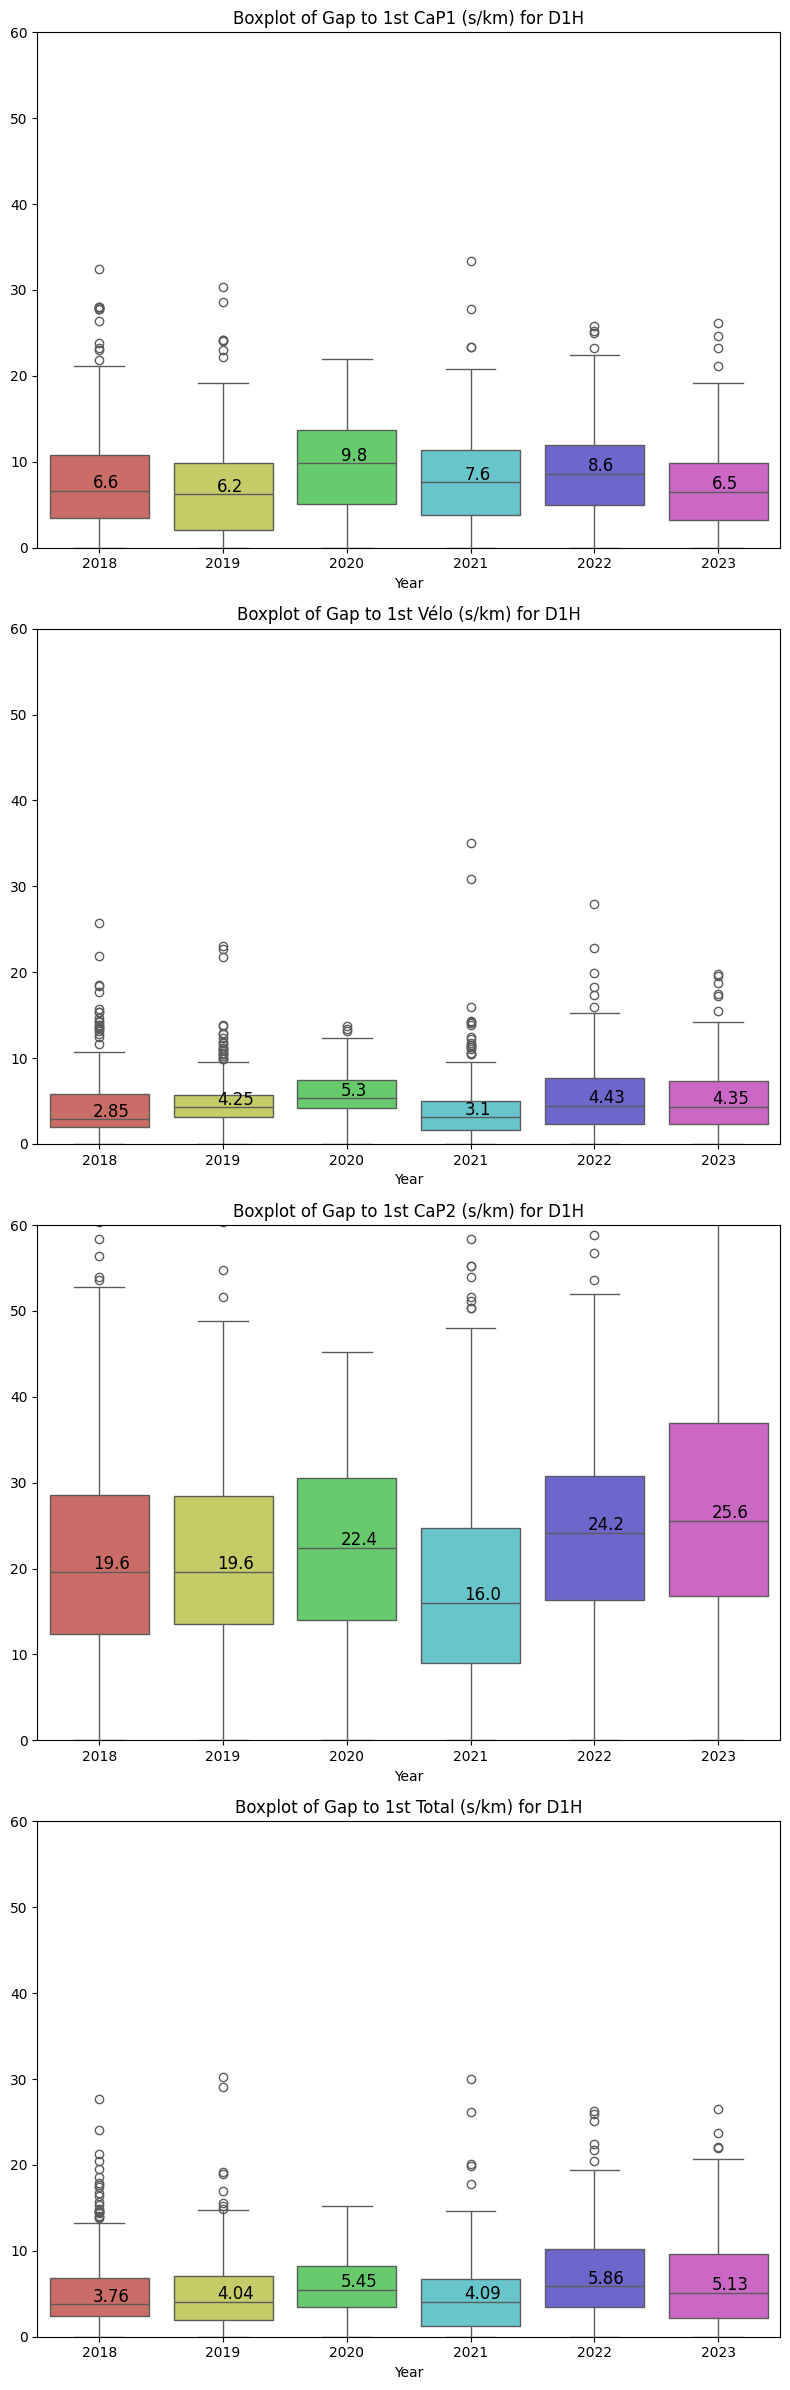

In [11]:
plot_gap_all_athlete("D1H",scratch_df)

### 2.1.2. Plot the gap for the top 30 for each year

In [8]:
# Let's create a dataframe with the top 30 of each race for the D1H
df_D1H = create_dataframe_top30(scratch_df,"D1H")

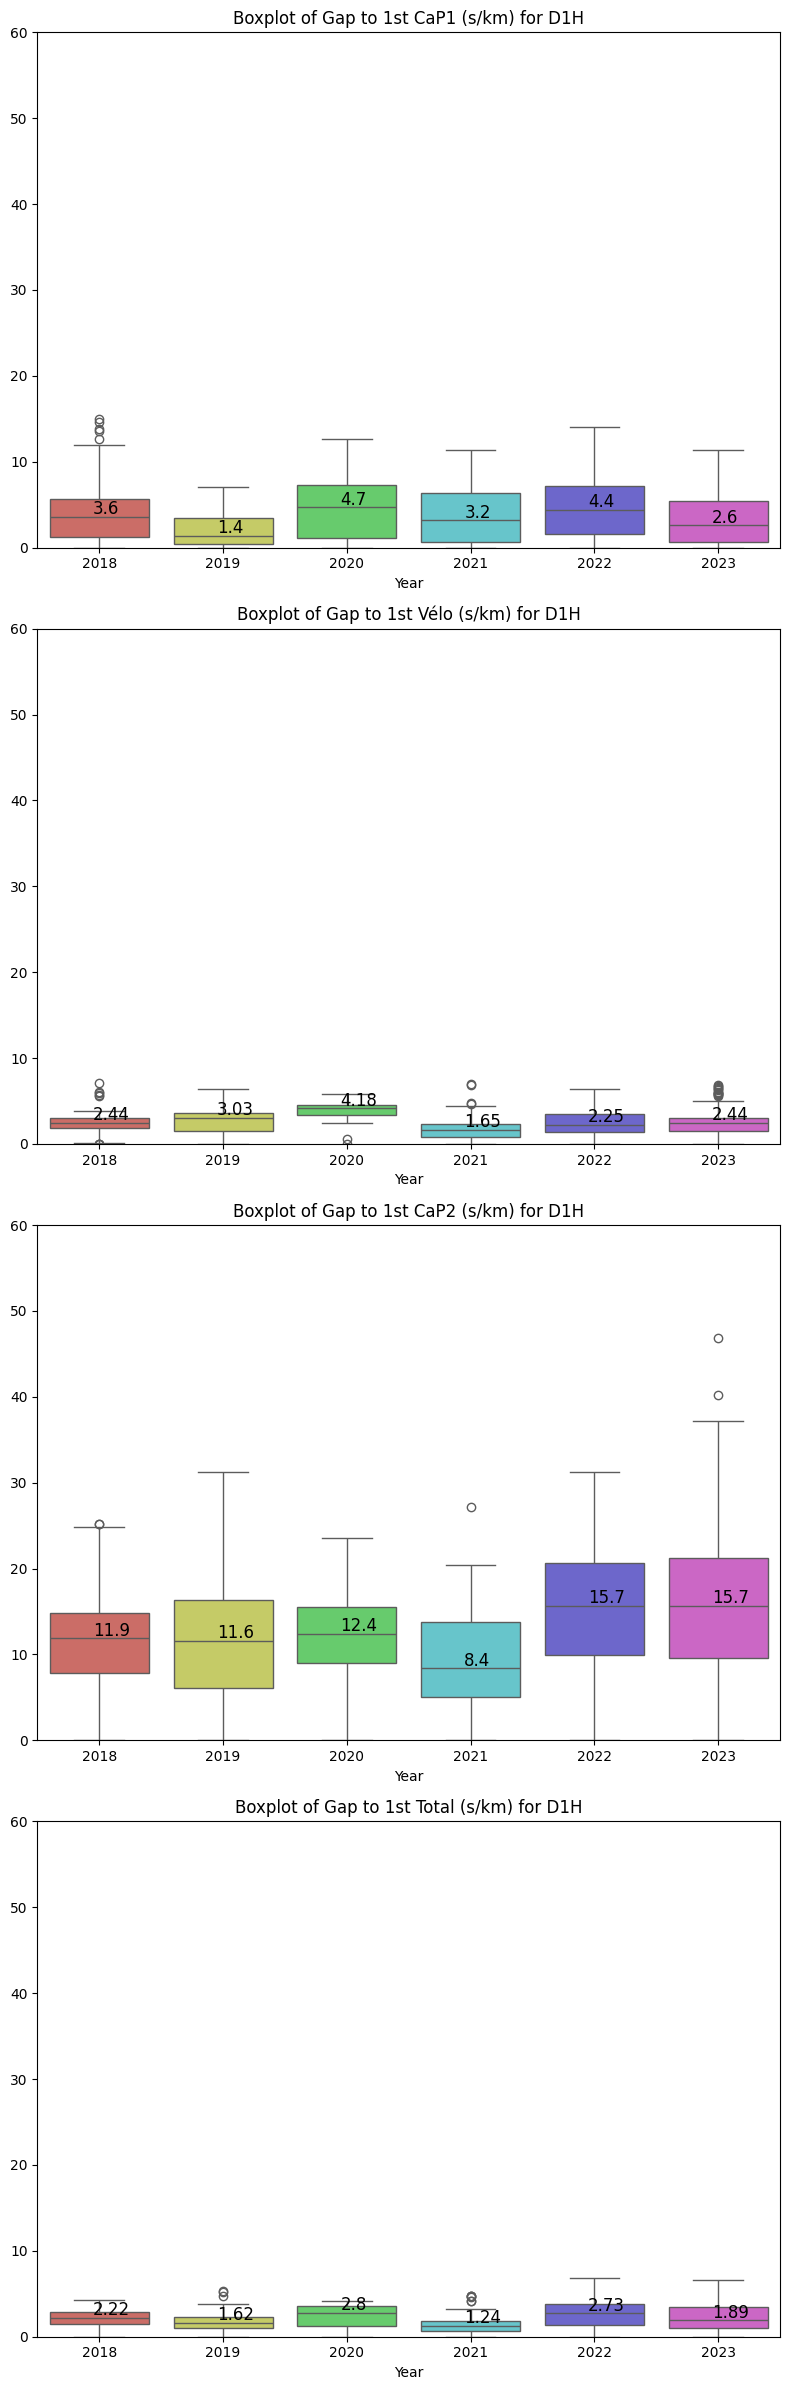

In [12]:
plot_gap_all_athlete("D1H",df_D1H)

### 2.1.3. Plot the race dynamics for the top 30 for a given year

#### 2023

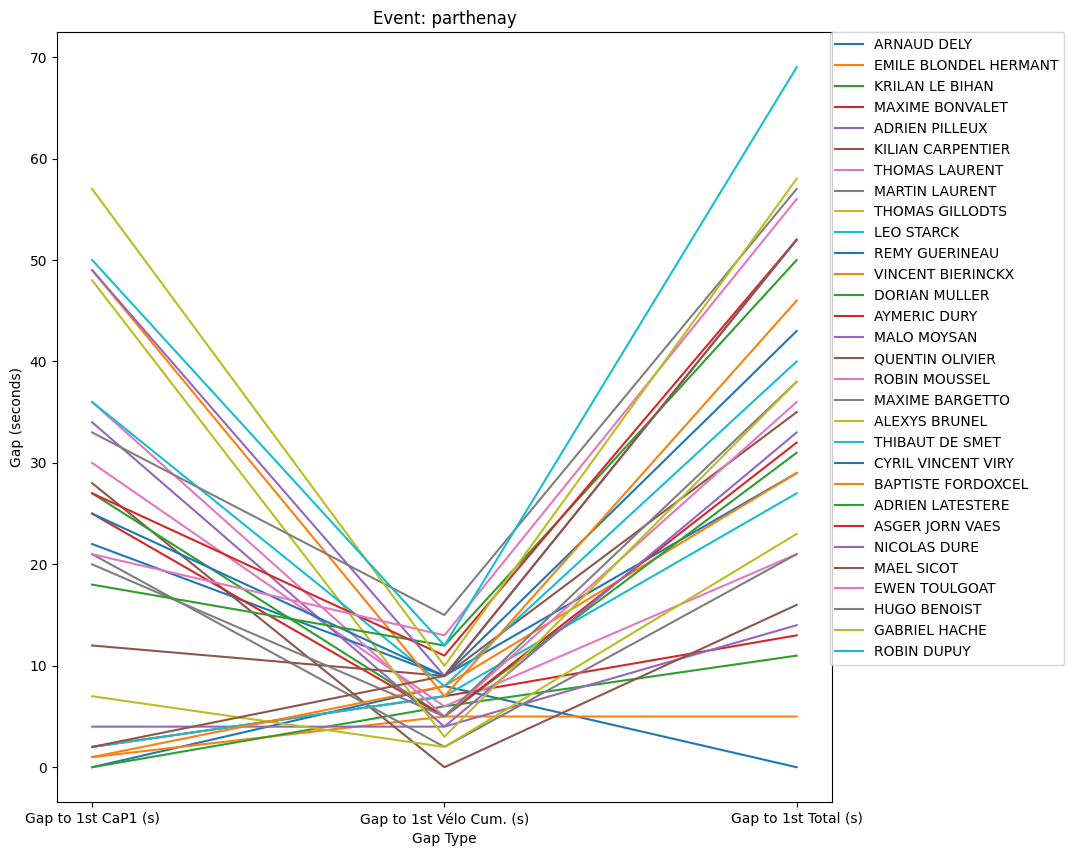

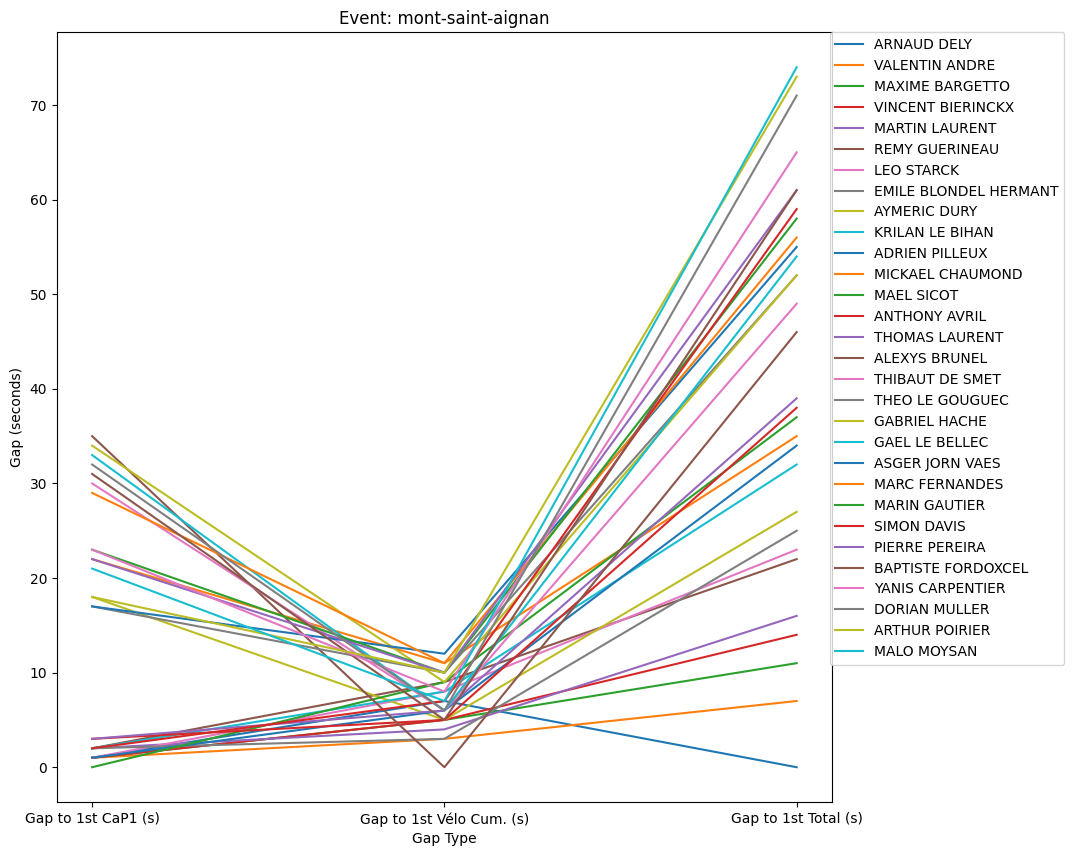

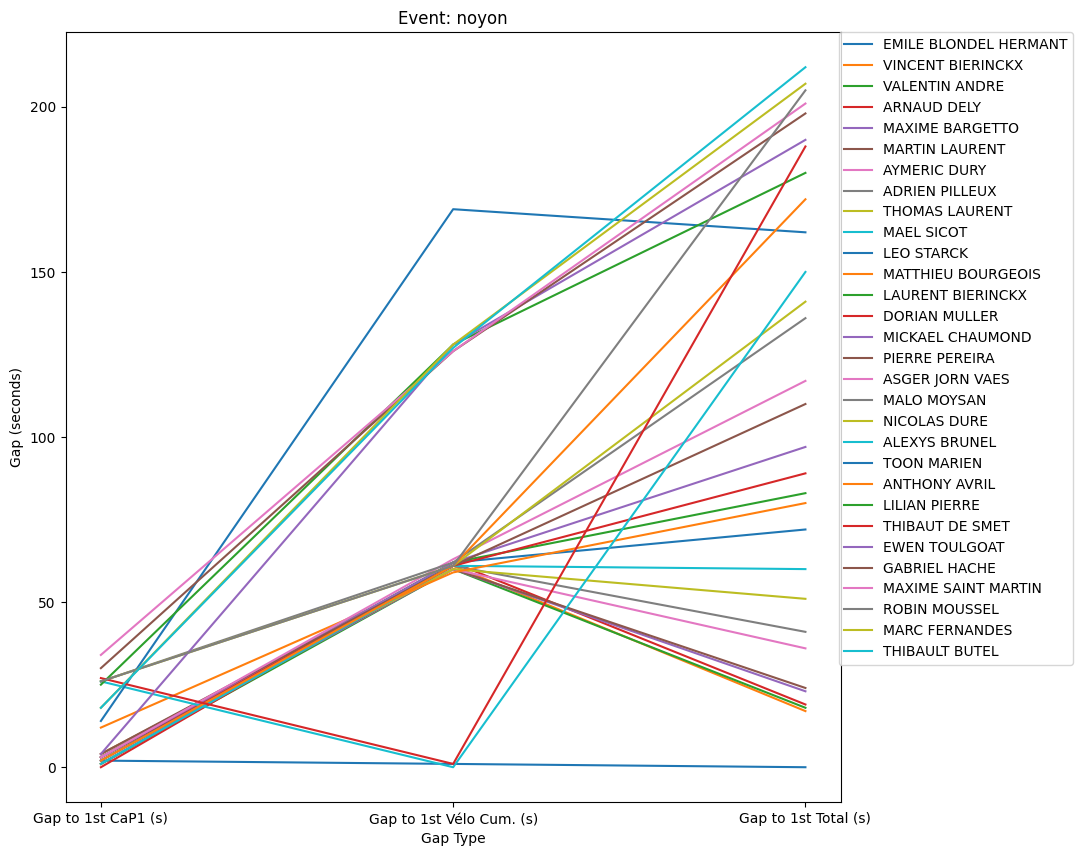

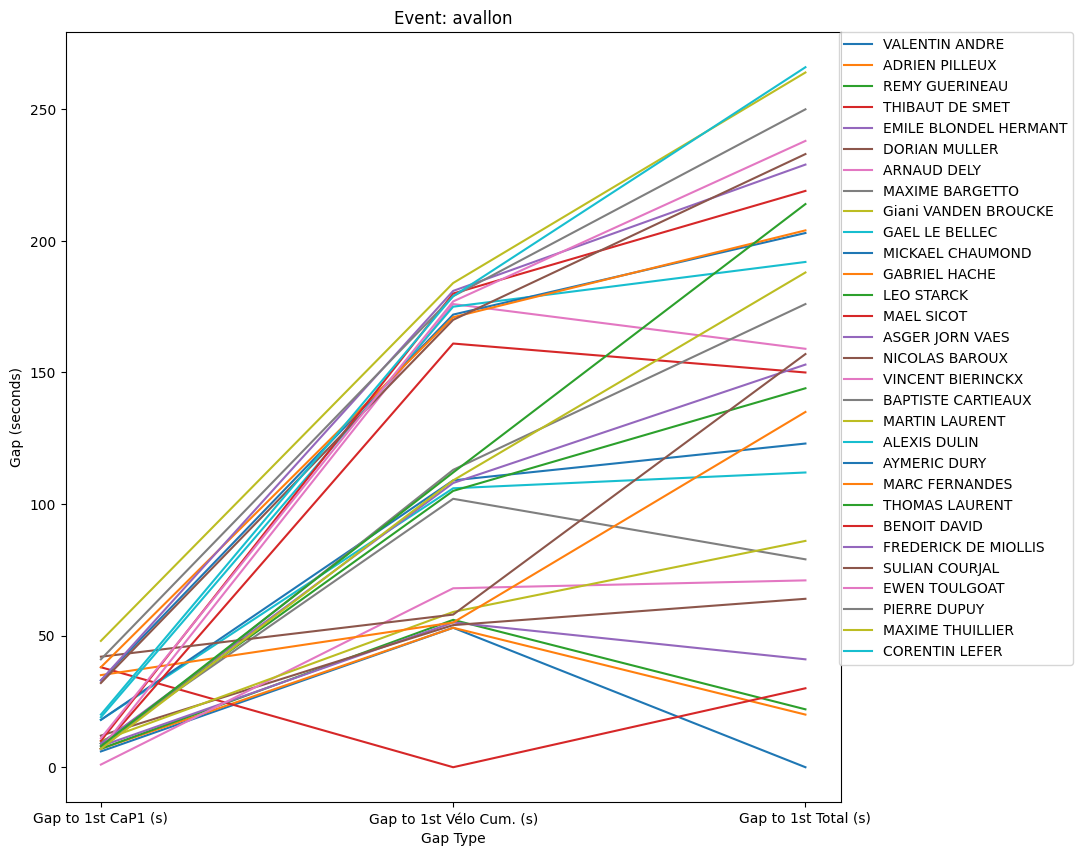

In [11]:
race_dynamics_plot(df_D1H,"D1H",2023)

#### 2022

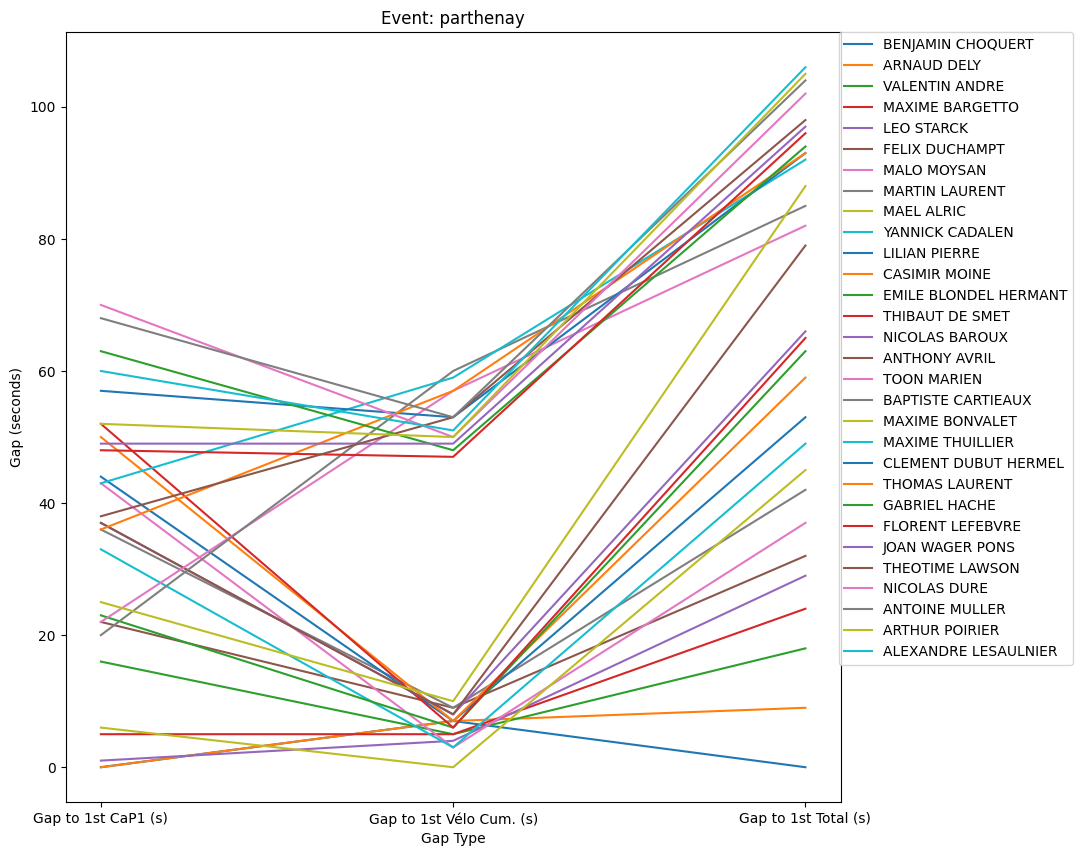

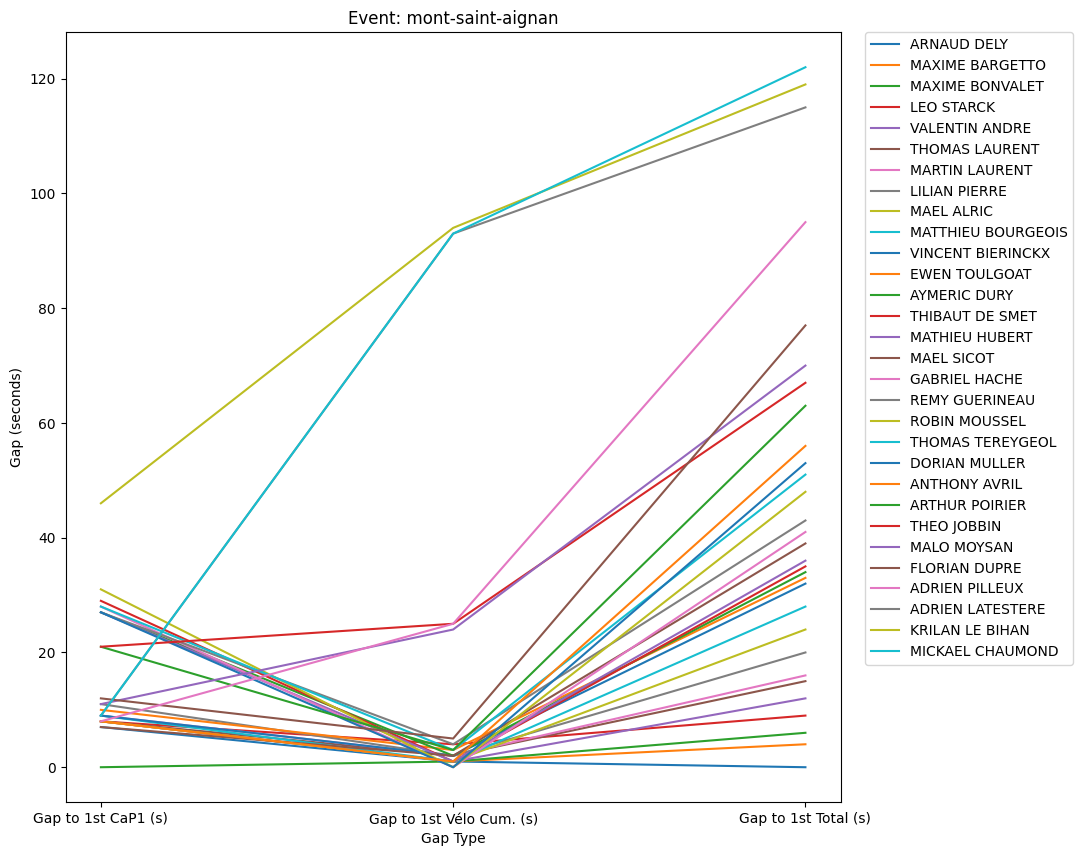

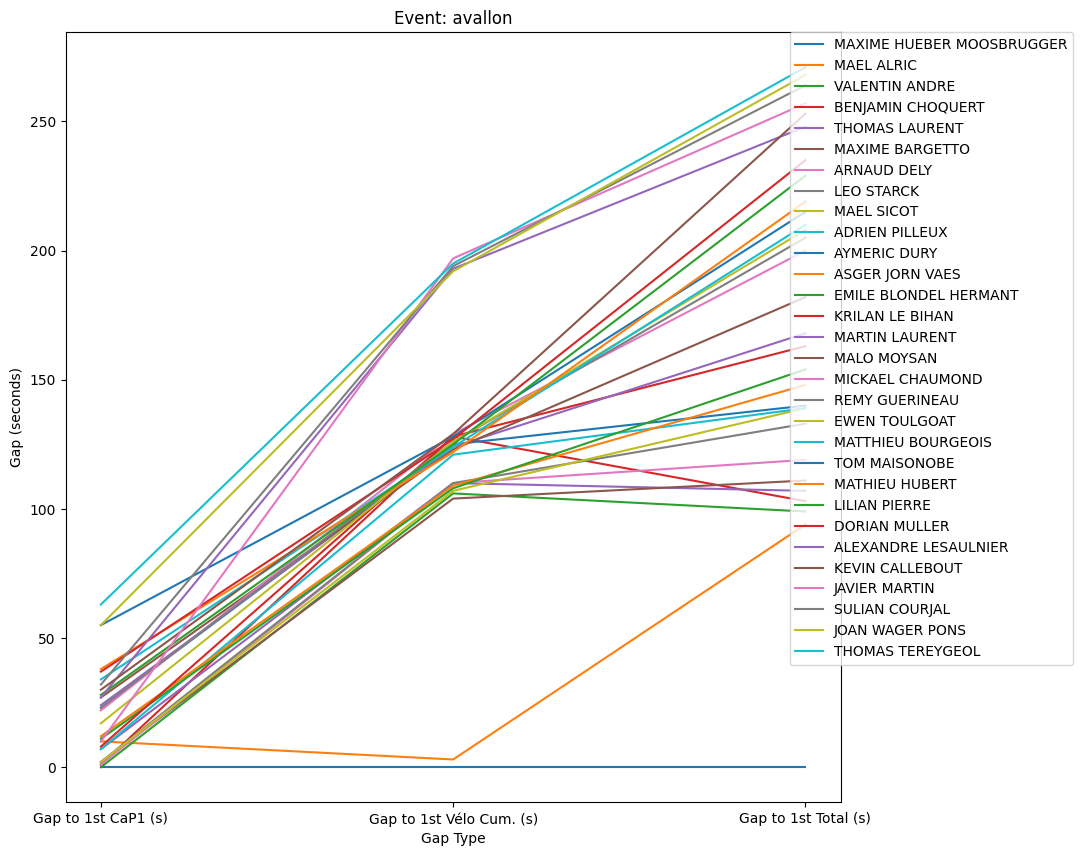

In [12]:
race_dynamics_plot(df_D1H,"D1H",2022)

#### 2021

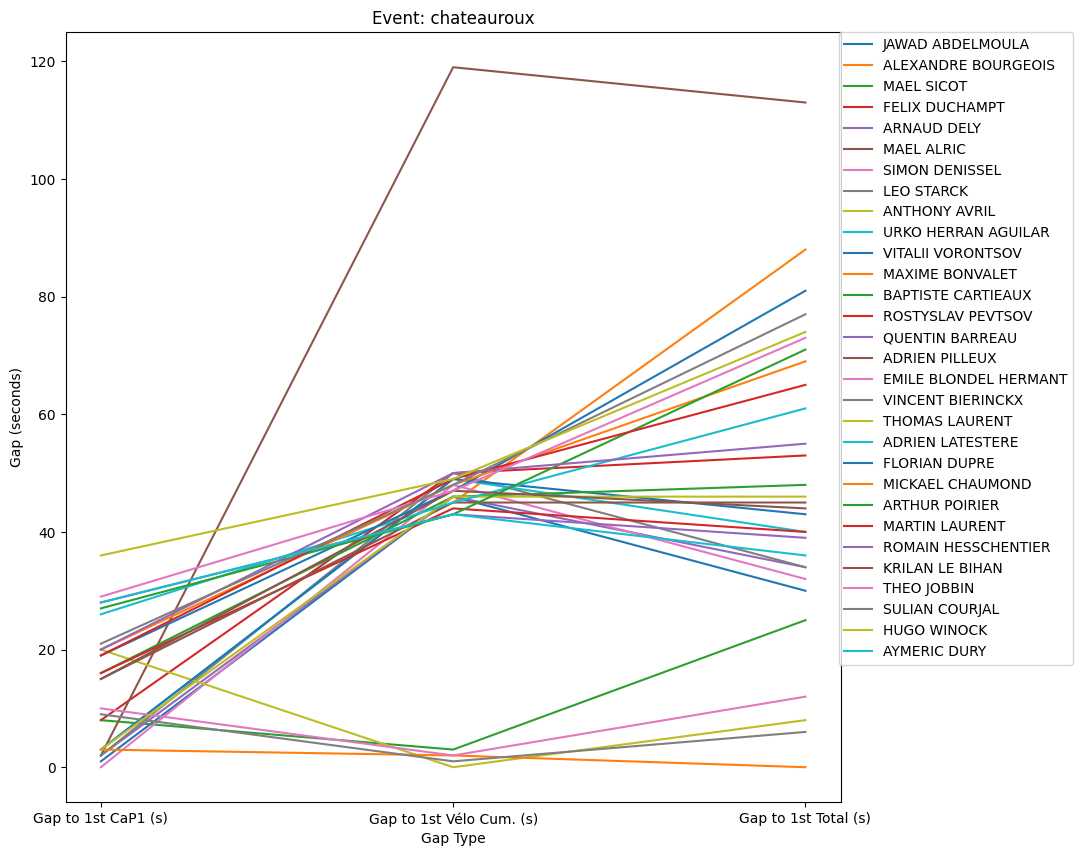

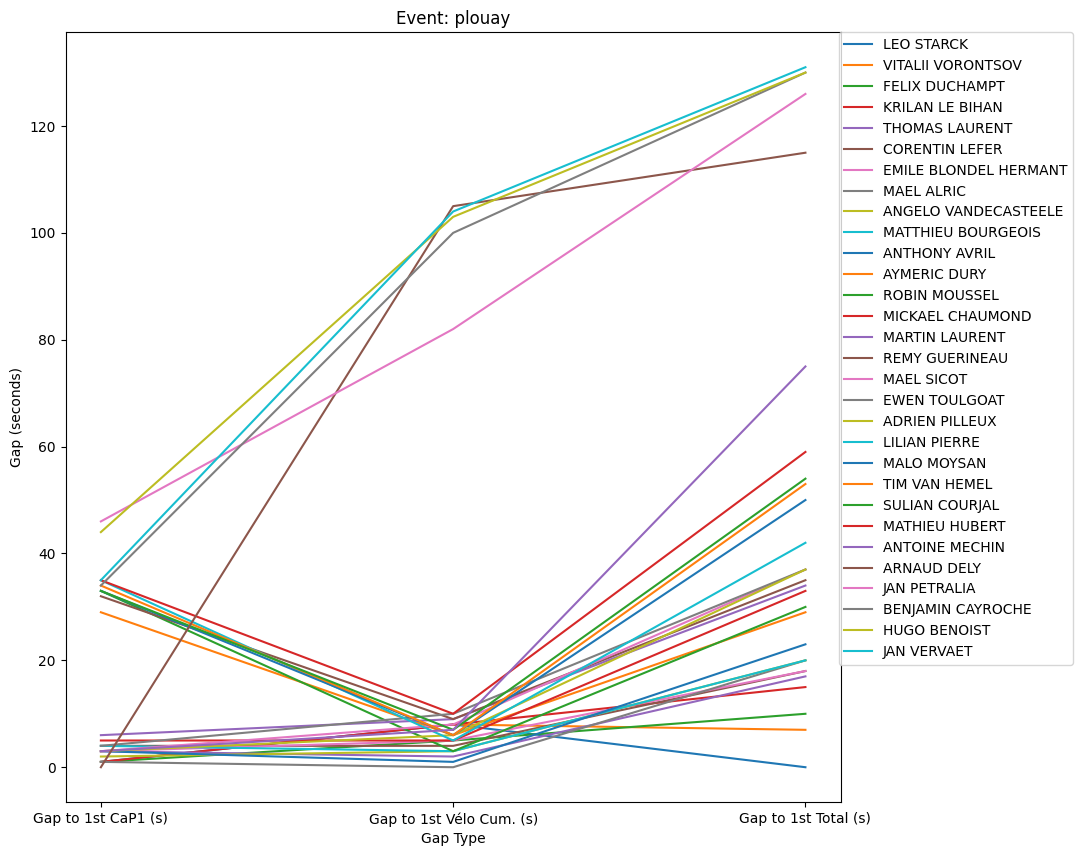

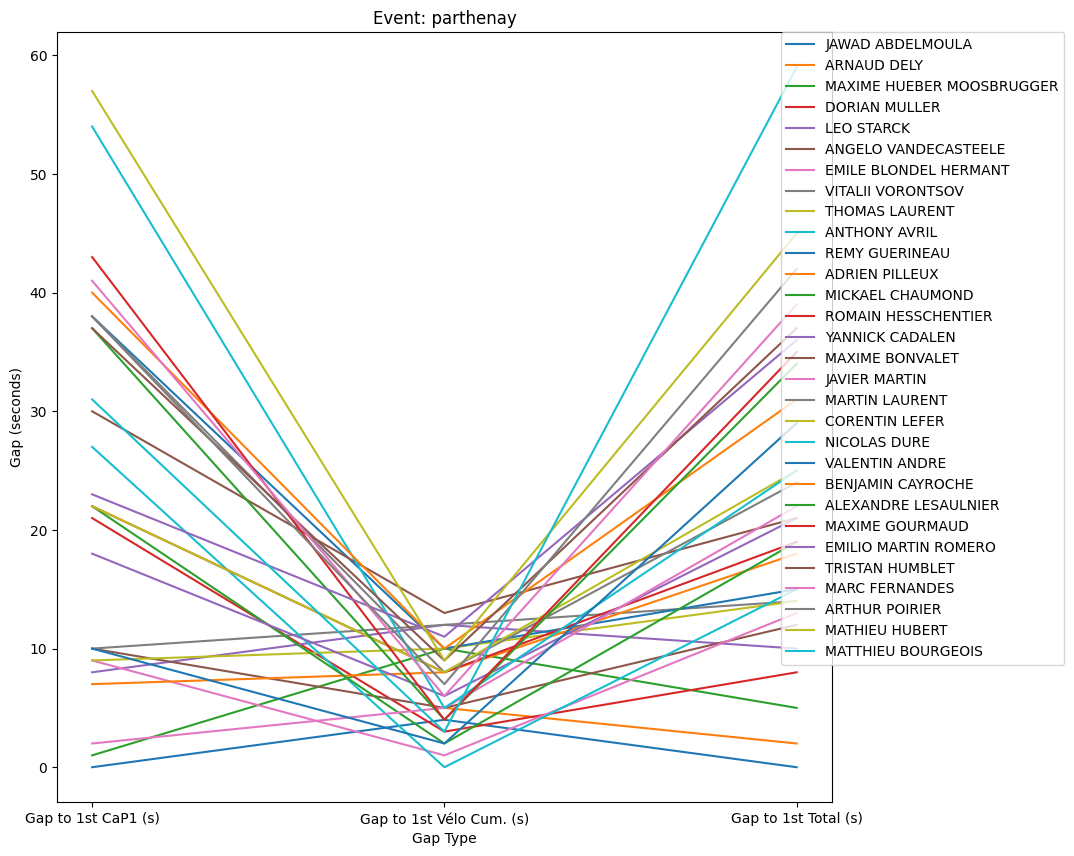

In [13]:
race_dynamics_plot(df_D1H,"D1H",2021)

#### 2020

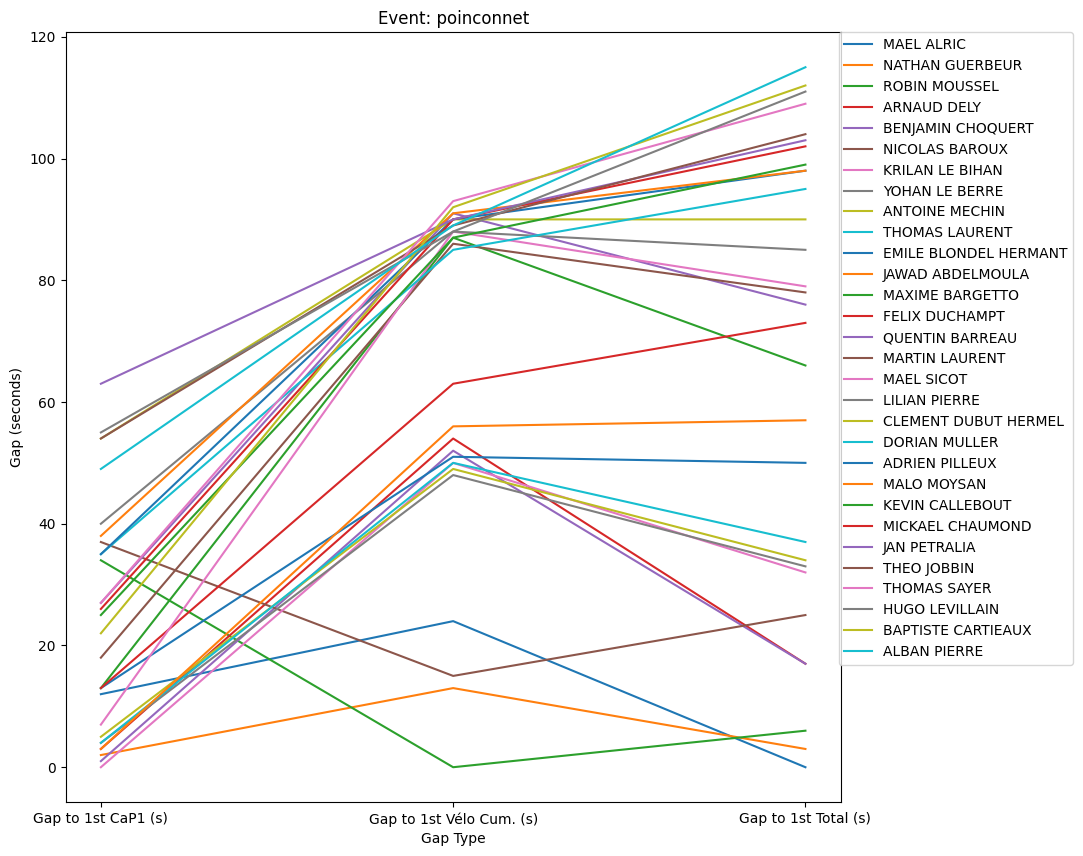

In [14]:
race_dynamics_plot(df_D1H,"D1H",2020)

#### 2019

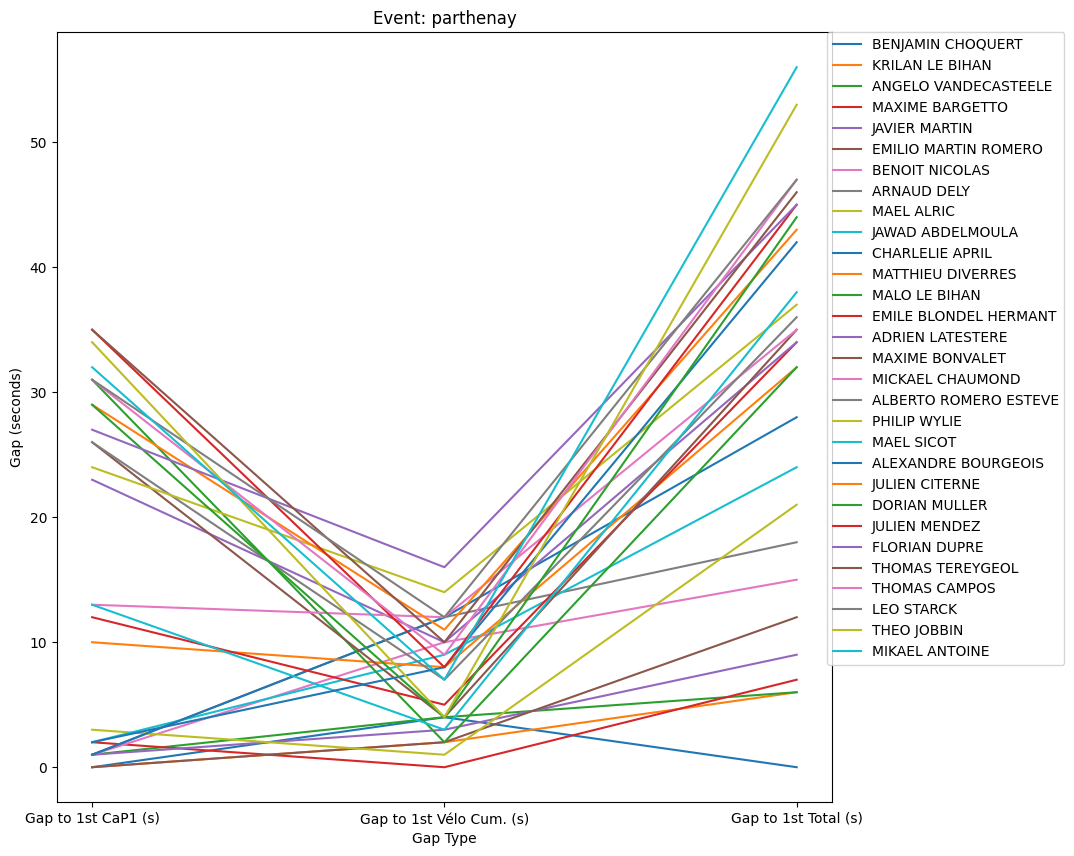

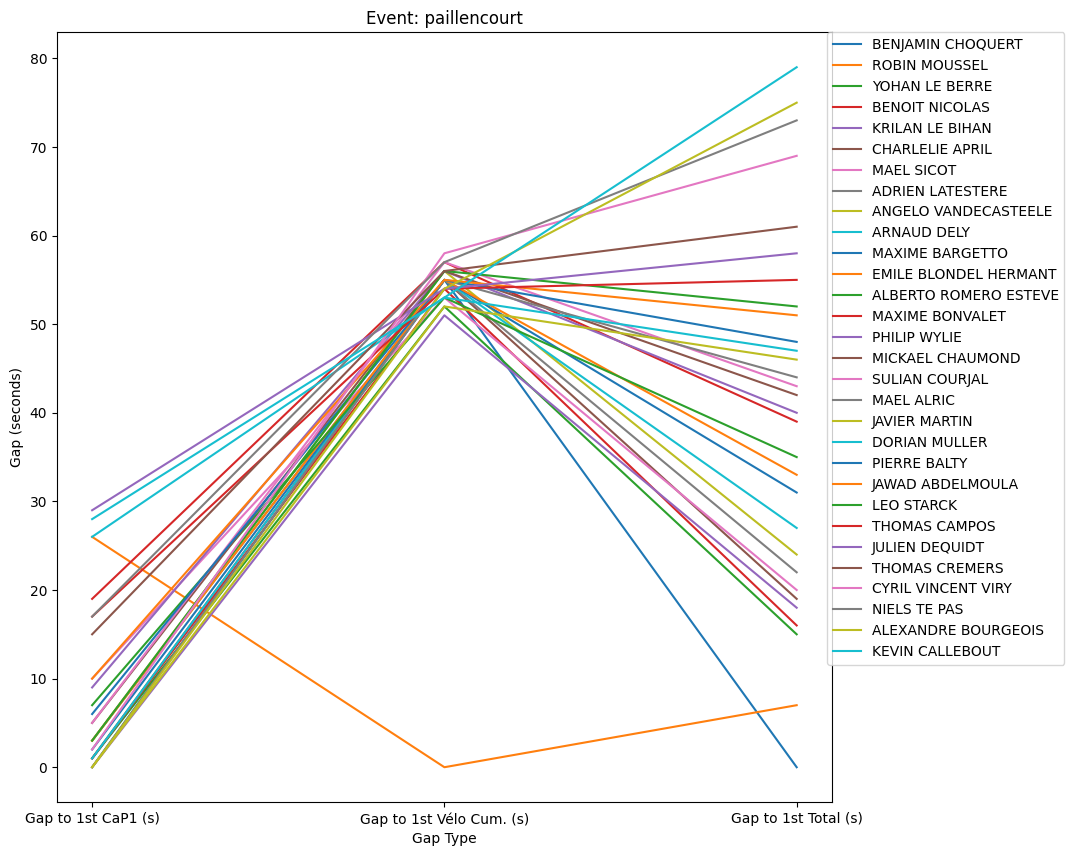

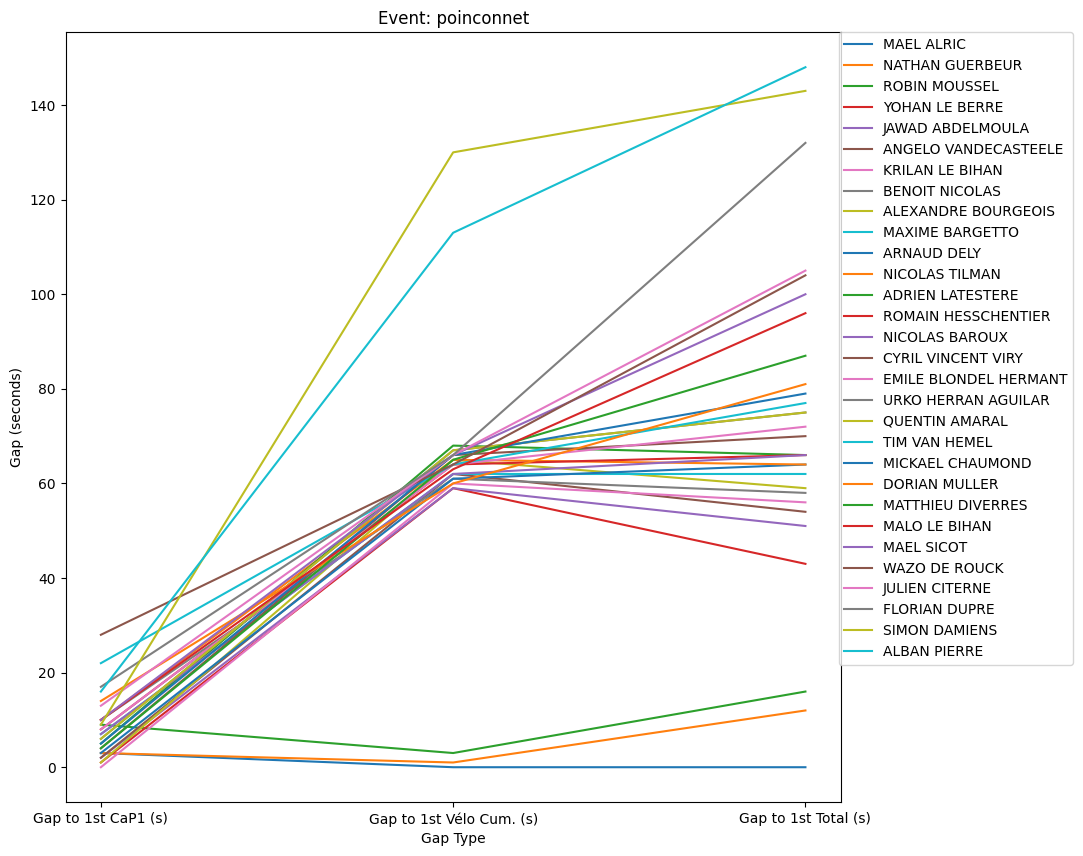

In [15]:
race_dynamics_plot(df_D1H,"D1H",2019)

#### 2018

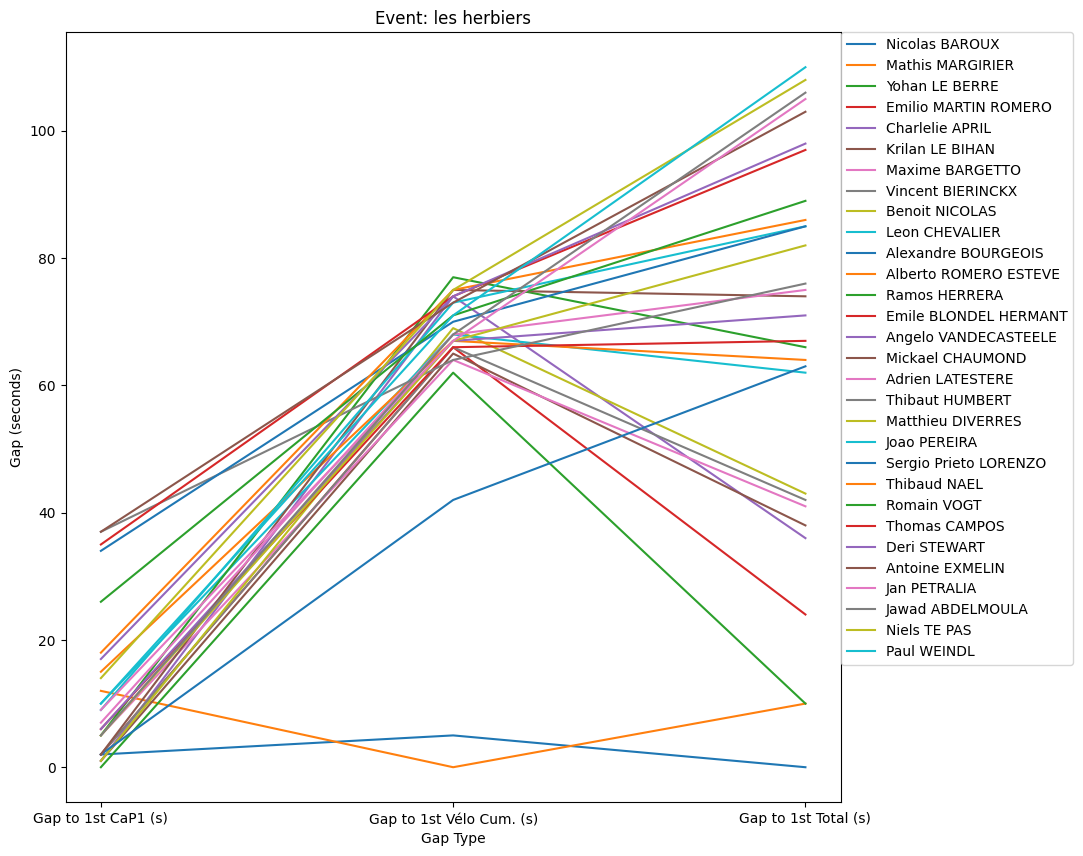

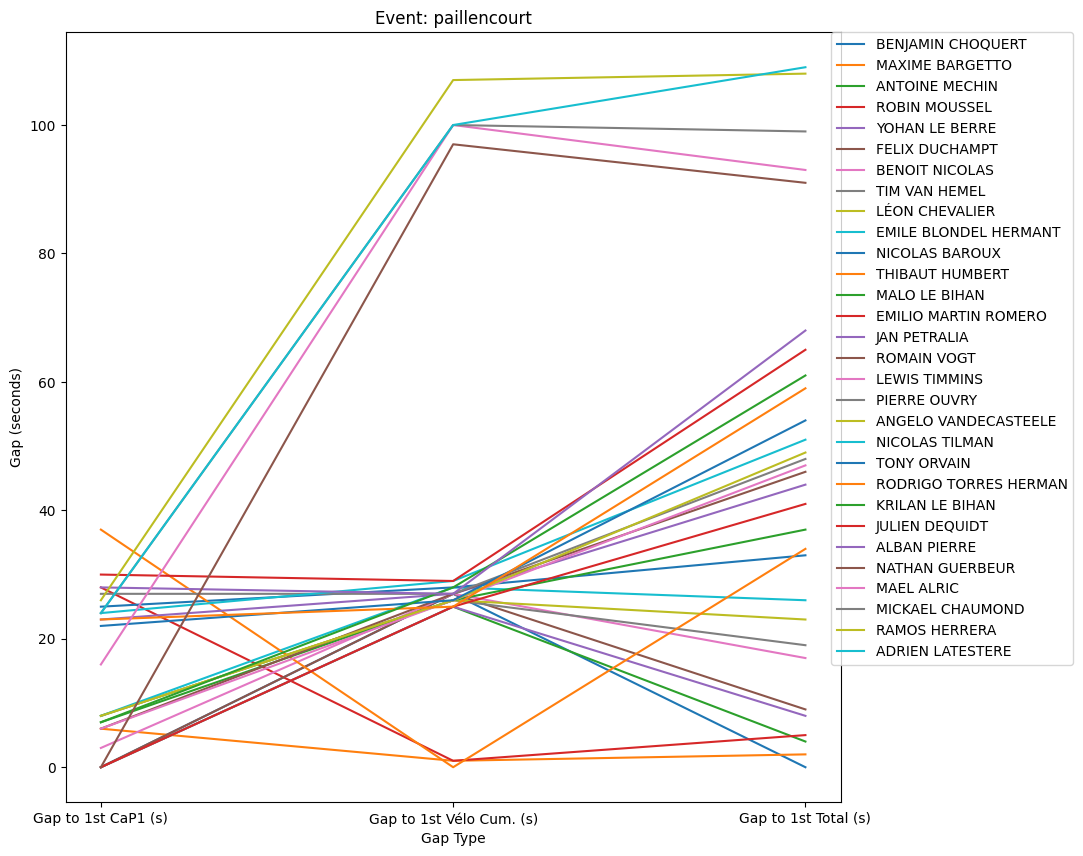

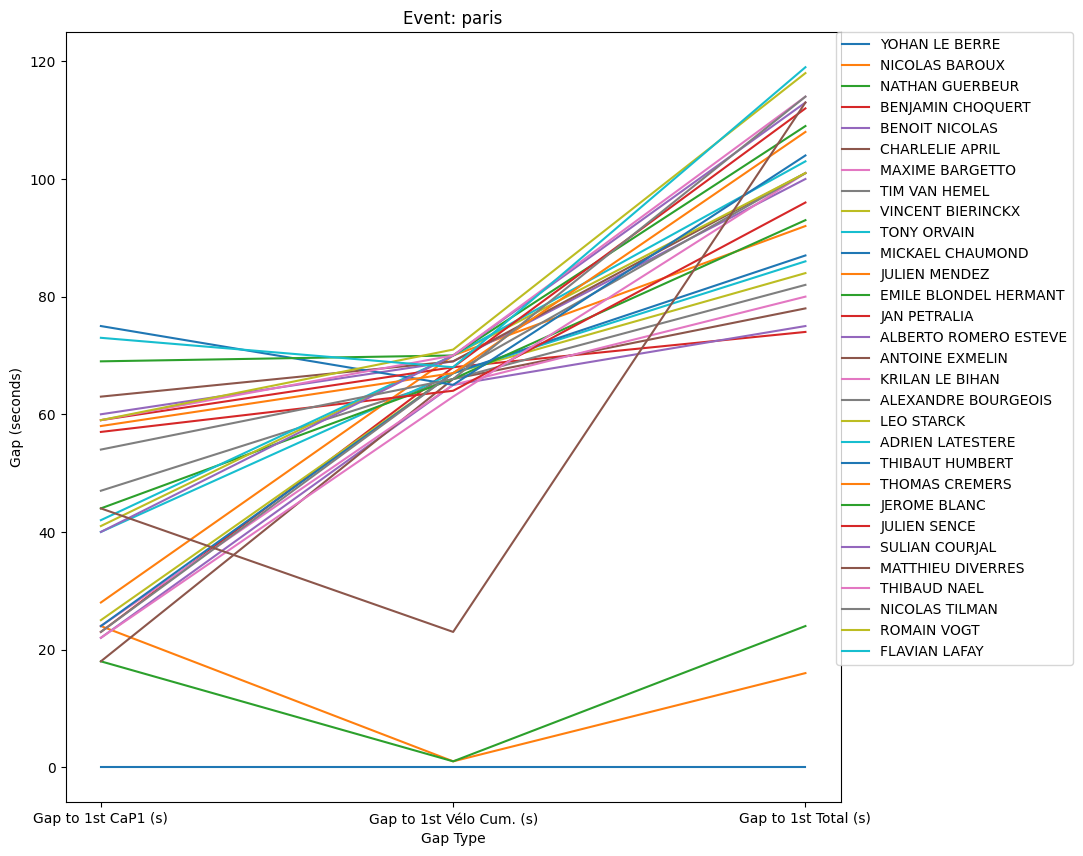

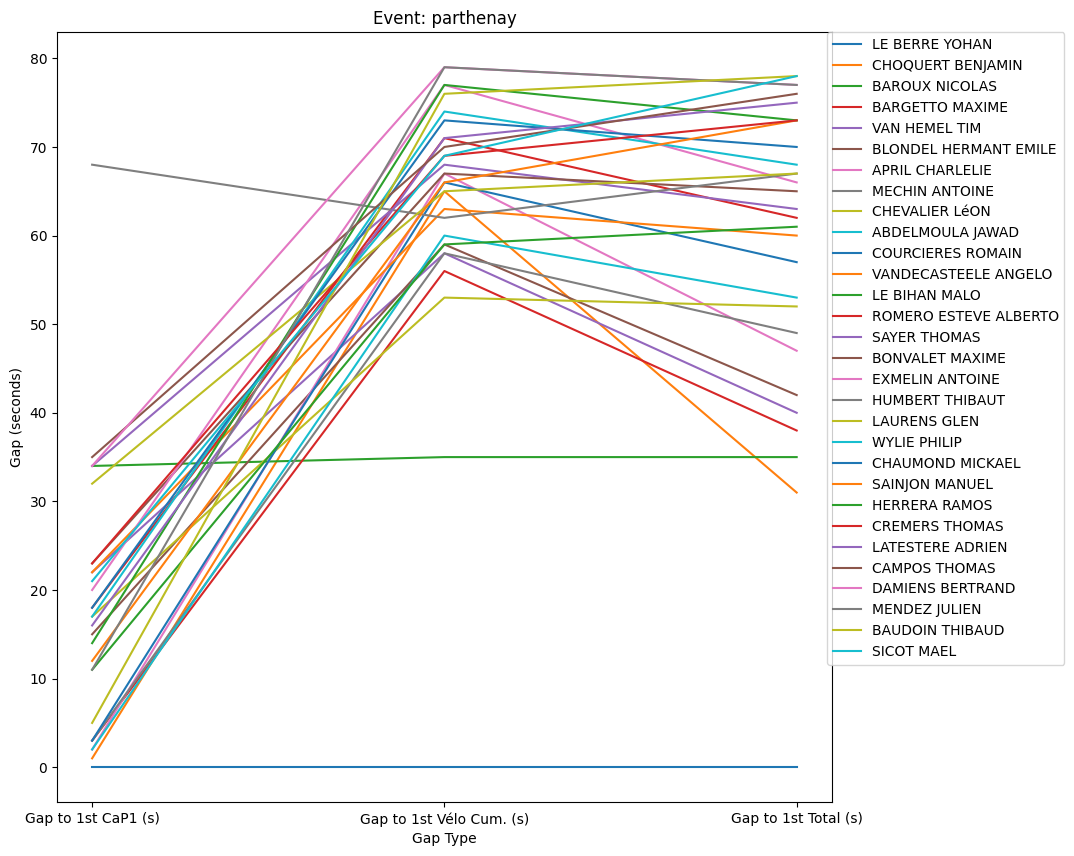

In [16]:
race_dynamics_plot(df_D1H,"D1H",2018)

### 2.1.4. Plot the gap between the winner and the 3rd athlète of each team

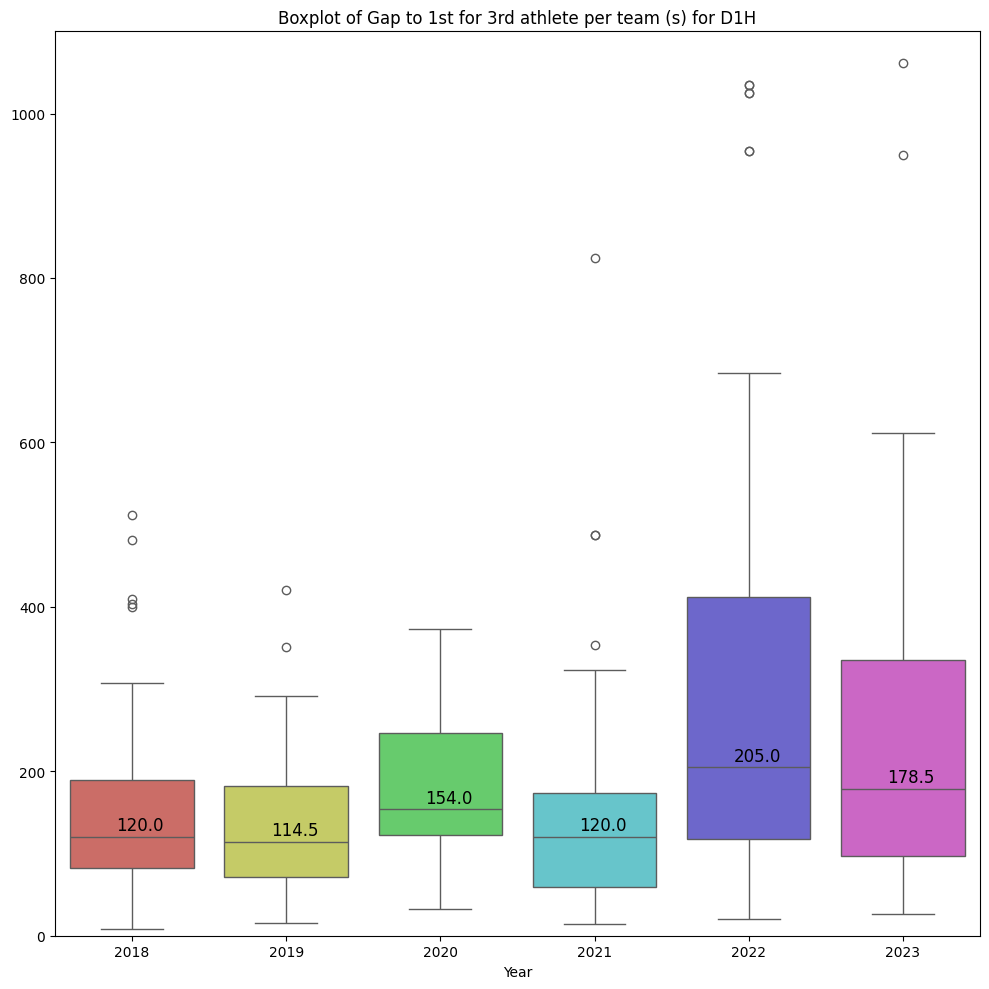

In [16]:
plot_gap_3rd_athlete("D1H",class_etape_df,1100)